In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

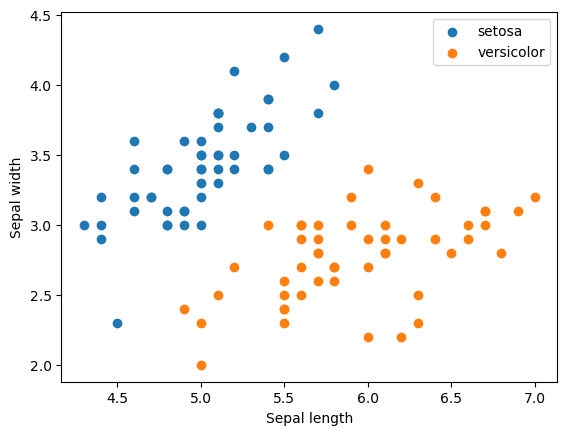

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2][0:100]
y = iris.target[0:100]
plt.scatter(X[0:50, 0], X[0:50, 1], label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], label = 'versicolor')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend()
plt.show()

In [3]:
class Perceptron:
    def __init__(self, iterations = 1000, learning_rate = 0.1):
        self.iterations = iterations
        self.learning_rate = learning_rate
        
    def fit(self, X, y):
        self.X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.y = y
        self.W = np.random.rand(X.shape[1] + 1, 1)
        for _ in range(self.iterations):
            for xi, yi in zip(self.X, self.y):
                xi = xi.reshape(xi.shape[0], 1)
                if(np.dot(self.W.T, xi) >= 0 and yi == 0):
                    self.W -= self.learning_rate * xi
                elif(np.dot(self.W.T, xi) < 0 and yi == 1):
                    self.W += self.learning_rate * xi
    
    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.where(np.dot(X, self.W) >= 0, 1, 0)
    
    def plot_decision_boundry(self):
        # w0 + w1x1 + w2x2 = 0
        x1 = np.linspace(4.0, 7.0, 10)
        x2 = -(self.W[1] / self.W[2]) * x1 - self.W[0] / self.W[2]
        plt.scatter(self.X[0:50, 1], self.X[0:50, 2], label = 'setosa')
        plt.scatter(self.X[50:100, 1], self.X[50:100, 2], label = 'versicolor')
        plt.plot(x1, x2, color = 'green')
        plt.xlabel("Sepal length")
        plt.ylabel("Sepal width")
        plt.legend()
        plt.show()

In [4]:
model = Perceptron(1000, 0.1)
model.fit(X, y)
print(model.W)

[[-12.56068819]
 [  7.91888226]
 [-10.04067558]]


In [5]:
y_pred = model.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



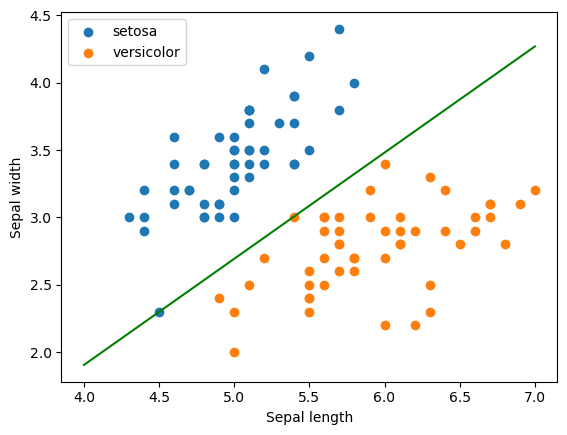

In [6]:
model.plot_decision_boundry()